# Experiment 01

First Tests from the predictions.

In [1]:
import numpy as np
import pandas as pd
import math

import sys
import Utils 
from Utils import calculateEMA, calculateBB, addPreviousDays, removeColumns, getPeriod, mape, mae, createDate, getDate, printResult

import matplotlib.pyplot as plt
import matplotlib.dates as mpdates
import mplfinance as mpf
from mplfinance.original_flavor import candlestick_ohlc

import warnings
warnings.filterwarnings('ignore')


def getPeriod2(df, begin, end, resetIndex = False):
    """
    Returns the df in the chosen interval
    
    Object begin: Start date forrmated as 'yyyy.mm.dd'.
    Object   end: End date 'yyyy.mm.dd'.

    returns a dataframe with the historic of the selected period
    """
    
    indexBegin = df[df['date']==begin].index[0]
    indexEnd = df[df['date']==end].tail(1).index[0]
    
    if (resetIndex):
        return df[(df.index >= indexBegin) & (df.index <= indexEnd)].reset_index(drop=True)
    else: 
        return df[(df.index >= indexBegin) & (df.index <= indexEnd)]

In [2]:
dfColumns = ['date','time','open', 'high', 'low','close','tickvol','volume','spread']
newColumns = ['open', 'high', 'low', 'close']

TEST_BEGIN = '2021.04.06'
TEST_END = '2021.06.01'

TRAIN_BEGIN = '2020.03.31'
TRAIN_END = '2021.05.31'

TIMES = 10

In [8]:
df = pd.read_csv('../Data/PETR4_M15.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])

df2 = pd.read_csv('../Data/VALE3_M15.csv', sep = "\t")
df2.columns = dfColumns
df2 = removeColumns(df2, ['tickvol', 'volume','spread'])

initialDf_PETR4 = getPeriod2(df, TEST_BEGIN, TEST_END)
initialDf_VALE3 = getPeriod2(df2, TEST_BEGIN, TEST_END)

In [5]:
initialDf_PETR4

,date,time,open,high,low,close
6197,2021.04.06,10:00:00,23.39,23.47,23.32,23.32
6198,2021.04.06,10:15:00,23.32,23.38,23.30,23.36
6199,2021.04.06,10:30:00,23.36,23.53,23.33,23.52
6200,2021.04.06,10:45:00,23.52,23.58,23.39,23.48
6201,2021.04.06,11:00:00,23.48,23.49,23.36,23.39
...,...,...,...,...,...,...
7311,2021.06.01,15:45:00,27.14,27.14,27.05,27.06
7312,2021.06.01,16:00:00,27.06,27.09,27.01,27.02
7313,2021.06.01,16:15:00,27.01,27.17,27.01,27.14
7314,2021.06.01,16:30:00,27.15,27.31,27.11,27.27


In [6]:
initialDf_VALE3

,date,time,open,high,low,close
6186,2021.04.06,10:00:00,103.80,104.35,103.52,103.77
6187,2021.04.06,10:15:00,103.77,103.80,102.92,103.23
6188,2021.04.06,10:30:00,103.23,104.25,103.00,104.23
6189,2021.04.06,10:45:00,104.23,104.56,103.70,104.03
6190,2021.04.06,11:00:00,104.03,104.12,103.15,103.34
...,...,...,...,...,...,...
7301,2021.06.01,15:45:00,113.84,113.95,113.61,113.72
7302,2021.06.01,16:00:00,113.72,114.00,113.70,113.99
7303,2021.06.01,16:15:00,113.99,114.00,113.90,113.96
7304,2021.06.01,16:30:00,113.97,114.00,113.88,113.88


In [7]:
pred_PETR4 = pd.read_pickle('../Data/PETR4_Pred_with_confidence.pkl')
pred_PETR4_minmax = pd.read_pickle('../Data/PETR4_Pred_with_confidence_minmax.pkl')
pred_PETR4_standard = pd.read_pickle('../Data/PETR4_Pred_with_confidence_standard.pkl')
pred_PETR4_power = pd.read_pickle('../Data/PETR4_Pred_with_confidence_power.pkl')
pred_PETR4.head(5)

,date,high_pred,low_pred,uncertainty_high,uncertainty_low,uncertainty_mean,high,low
1299,2021.04.06,23.744667,23.063667,0.572697,0.446347,0.509522,23.58,23.13
1300,2021.04.07,23.733500,22.986967,0.542209,0.423986,0.483097,23.55,23.15
1301,2021.04.08,23.733867,23.004567,0.558286,0.429597,0.493942,23.26,22.61
1302,2021.04.09,23.418633,22.756267,0.463328,0.415596,0.439462,23.01,22.61
1303,2021.04.12,23.547600,22.882600,0.493237,0.397130,0.445183,23.58,23.01


In [8]:
pred_VALE3 = pd.read_pickle('../Data/VALE3_Pred_with_confidence.pkl')
pred_VALE3_minmax = pd.read_pickle('../Data/VALE3_Pred_with_confidence_minmax.pkl')
pred_VALE3_standard = pd.read_pickle('../Data/VALE3_Pred_with_confidence_standard.pkl')
pred_VALE3_power = pd.read_pickle('../Data/VALE3_Pred_with_confidence_power.pkl')
pred_VALE3.head(15)

,date,high_pred,low_pred,uncertainty_high,uncertainty_low,uncertainty_mean,high,low
1299,2021.04.06,102.037400,98.699933,2.117796,1.529757,1.823776,104.56,102.05
1300,2021.04.07,102.161033,98.813433,2.083994,1.412334,1.748164,105.32,102.15
1301,2021.04.08,102.236800,98.946067,1.877845,1.155408,1.516627,105.30,104.12
1302,2021.04.09,102.243133,98.959800,1.871320,1.147412,1.509366,104.66,102.94
1303,2021.04.12,102.227100,98.931333,1.902371,1.203175,1.552773,103.63,102.21
1304,2021.04.13,102.227100,98.931333,1.902371,1.203175,1.552773,104.29,102.85
1305,2021.04.14,102.227100,98.931333,1.902371,1.203175,1.552773,107.78,103.77
1306,2021.04.15,102.227100,98.931333,1.902371,1.203175,1.552773,109.88,107.55
1307,2021.04.16,102.227100,98.931333,1.902371,1.203175,1.552773,109.11,107.50
1308,2021.04.19,102.227100,98.931333,1.902371,1.203175,1.552773,109.88,107.64


### Início do sistema

In [1]:
def getDay(df, day):
    return df[df['date']==day]

def buy(value, availableMoney, opr='normal'):
    lotValue = value*100
    quantity = math.floor(availableMoney/lotValue)
    
    amount = quantity*lotValue
    remainingMoney = availableMoney - amount
    
    return remainingMoney, quantity

def sell(value, amount, opr='normal'):
    if(opr == 'normal'):
        return value*amount*100
    else:
        return value*amount*100

In [4]:
dayDf = getPeriod2(initialDf_PETR4, '2021.04.06', '2021.04.06')
dayDf.head(5)

NameError: name 'initialDf_PETR4' is not defined

## Funções

In [ ]:
def runStrategy(df, dailyDf, Money, stopLoss, std, use_uncertainty, uncertainty_threshold):
    size = len(df.index)

    Money = Money
    stopLoss = stopLoss

    orders = []

    for day in range(0,size):
        currentDay =  df.iloc[day].date

        lowPred = df.iloc[day].low_pred*(1+std)
        highPred = df.iloc[day].high_pred*(1-std)
        day_uncertainty = df.iloc[day].uncertainty_mean
        if use_uncertainty and day_uncertainty > uncertainty_threshold:
            continue

        dayDf = getPeriod2(dailyDf, currentDay, currentDay)
        daySize = len(dayDf.index)

        op = 'none'
        quantity = 0
        trade = []

        for i in range(0,daySize):
            currentTime = dayDf.iloc[i]

            if((op == 'buy') and (currentTime.close < opPrice*(1-stopLoss) or currentTime.close >= highPred or i == daySize-1)):
                isStop = False
                if(currentTime.close < opPrice*(1-stopLoss)): isStop = True
                aux = sell(currentTime.close, quantity)
                Money = Money + aux 
                trade = trade + [currentTime.time, 'Sell', currentTime.close, currentTime.close-opPrice,(currentTime.close-opPrice)*100*quantity, isStop, Money, day_uncertainty]
                orders.append(trade)

                quantity = 0
                op = 'none'

            elif((op == 'sell') and (currentTime.close > opPrice*(1+stopLoss) or currentTime.close <= lowPred or i == daySize-1)):
                isStop = False
                if(currentTime.close > opPrice*(1+stopLoss)): isStop = True

                aux = sell(currentTime.close, quantity)
                Money = Money + (opPrice*100*quantity) + ((opPrice*100*quantity) - aux) 
                trade = trade + [currentTime.time, 'Buy', currentTime.close, opPrice-currentTime.close,(opPrice-currentTime.close)*100*quantity, isStop, Money, day_uncertainty]
                orders.append(trade)

                quantity = 0
                op = 'none'

            elif(op == 'none' and i < daySize-1):
                if(currentTime.close <= lowPred):
                    Money, quantity = buy(currentTime.close, Money)
                    opPrice = currentTime.close
                    op = 'buy'

                    trade = [currentTime.date, quantity, currentTime.time, 'Buy', currentTime.close]

                elif(currentTime.close >=  highPred):
                    Money, quantity = buy(currentTime.close, Money)
                    opPrice = currentTime.close
                    op = 'sell'

                    trade = [currentTime.date, quantity, currentTime.time, 'Sell', currentTime.close]
        #print('eday '+str(day)+' money: '+str(Money))
    
    ordersDf = pd.DataFrame(orders)
    if not ordersDf.empty:
        ordersDf.columns = ['date','batches','time_op1','op1','value_op1','time_op2','op2','value_op2', 'profit', 'totalProfit', 'stop','Amount', 'uncertainty']
    tradedDays = ordersDf['date'].nunique() if not ordersDf.empty else 0
    return ordersDf, tradedDays

In [6]:
def calcular_score(finalAmount, acuracia, drawdown, peso_amount=0.6, peso_acuracia=0.3, peso_drawdown=0.2):
    """
    Calcula o Score baseado nos pesos de Final Amount, Acurácia e Maximum Drawdown.
    
    Parâmetros:
    finalAmount (float): O valor final do capital após a execução da estratégia.
    acuracia (float): A porcentagem de acurácia da estratégia.
    drawdown (float): O valor do Maximum Drawdown.
    peso_amount (float): Peso para o Final Amount.
    peso_acuracia (float): Peso para a Acurácia.
    peso_drawdown (float): Peso para o Maximum Drawdown.
    
    Retorna:
    float: O Score calculado.
    """
    # Normalização das métricas
    normalized_finalAmount = finalAmount / 500000  # Assume que o valor inicial foi 500000
    normalized_acuracia = acuracia / 100  # A acurácia é dada em % (0-100), então normaliza para 0-1
    normalized_drawdown = abs(drawdown)/100  # O drawdown já é negativo, então toma o valor absoluto
    
    # Calcula o score
    score = (peso_amount * normalized_finalAmount) + (peso_acuracia * normalized_acuracia) - (peso_drawdown * normalized_drawdown)
    
    return score

import matplotlib.pyplot as plt

def plot_amount_curve(df, DDF, savePath=None):
    """
    Plota a curva de Amount ao longo do tempo, destacando o maior drawdown e seus pontos críticos.
    """
    if df.empty or "date" not in df or "Amount" not in df:
        print("Dados inválidos para plotar.")
        return
    
    # Inicializar variáveis
    max_drawdown = None
    peak_idx = None
    trough_idx = None

    if not DDF.empty and "drawdown" in DDF:
        max_drawdown_register = DDF['drawdown'].idxmax()
        max_drawdown, peak_idx, trough_idx = (
            DDF.iloc[max_drawdown_register].drawdown, 
            DDF.iloc[max_drawdown_register].maxDay, 
            DDF.iloc[max_drawdown_register].minDay
        )
    
    # Criar gráfico
    plt.figure(figsize=(12, 6))
    plt.plot(df["date"], df["Amount"], label="Capital ao longo do tempo", color="blue")

    if peak_idx is not None and trough_idx is not None:
        # Destacar o ponto de máxima alta
        plt.scatter(df.loc[peak_idx, "date"], df.loc[peak_idx, "Amount"], color="green", label="Máxima Alta", zorder=3)
        plt.text(df.loc[peak_idx, "date"], df.loc[peak_idx, "Amount"], f' Pico\n {df.loc[peak_idx, "Amount"]:.2f}', 
                 verticalalignment='bottom', horizontalalignment='right', fontsize=10, color='green')

        # Destacar o ponto de máxima queda (drawdown)
        plt.scatter(df.loc[trough_idx, "date"], df.loc[trough_idx, "Amount"], color="red", label="Máxima Queda", zorder=3)
        plt.text(df.loc[trough_idx, "date"], df.loc[trough_idx, "Amount"], f' Fundo\n {df.loc[trough_idx, "Amount"]:.2f}', 
                 verticalalignment='top', horizontalalignment='right', fontsize=10, color='red')

        # Traçar uma linha conectando o pico ao ponto de maior drawdown
        plt.plot([df.loc[peak_idx, "date"], df.loc[trough_idx, "date"]], 
                 [df.loc[peak_idx, "Amount"], df.loc[trough_idx, "Amount"]], 
                 color="black", linestyle="dashed", linewidth=2, label="Drawdown")
        
        # Exibir o valor do maior drawdown dentro da imagem
        plt.text(df.loc[trough_idx, "date"], df.loc[trough_idx, "Amount"], 
                 f'Drawdown: {max_drawdown:.2f}%', fontsize=12, color="black", 
                 bbox=dict(facecolor="white", alpha=0.8, edgecolor="black"))

    plt.xlabel("Data")
    plt.ylabel("Capital (Amount)")
    plt.title("Evolução do Capital ao Longo do Tempo")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)

    if savePath:
        plt.tight_layout()
        plt.savefig(savePath)

    # Exibir gráfico
    plt.show()


In [7]:
def calculateDrawdown(df):
    length = len(df.index)
    lst = []

    for i in range (0, length):
        trade = df.iloc[i]
        if (i==0):
            max = trade.Amount
            max_date = trade.date
            max_day = i

            min = trade.Amount
            min_date = trade.date
            min_day = i

        elif (i == length - 1):
            if(trade.Amount < min):
                min = trade.Amount
                min_date = trade.date
                min_day = i
                drawdown = ((max-min)/max)*100
                lst.append([max_day, max_date, max, min_day, min_date, min, drawdown])

        elif(trade.Amount >= df.iloc[i-1].Amount and trade.Amount > df.iloc[i+1].Amount):
            if(trade.Amount > max):
                max = trade.Amount
                min = trade.Amount
                max_date = trade.date
                max_day = i
                min_date = trade.date
                min_day = i

                #print(str(trade.day)+' - max ' + str(max))

        elif(trade.Amount <= df.iloc[i-1].Amount and trade.Amount < df.iloc[i+1].Amount):

            if(trade.Amount < min):
                min = trade.Amount
                min_date = trade.date
                min_day = i
                #print(str(trade.day)+' - min ' + str(min))
                drawdown = ((max-min)/max)*100

                lst.append([max_day, max_date, max, min_day, min_date, min, drawdown])
                #print(lst)
                #print(drawdown)

    DDDf = pd.DataFrame(lst)
    if(len(lst)==0):
        return DDDf, 0
    DDDf.columns = ['maxDay', 'maxDate', 'maxValue','minDay', 'minDate', 'minValue', 'drawdown']
    
    return DDDf, DDDf['drawdown'].max()

## Execução

In [8]:
fundos = ['ABEV3', 'BBDC4','EGIE3', 'ITUB4', 'JBSS3', 'PETR4']
fundo = fundos[3]
pred_ = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_.pkl')
pred_minmax = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_minmax.pkl')
pred_standard = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_standard.pkl')
pred_power = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_power.pkl')

df = pd.read_csv(f'../Data/{fundo}_M15.csv', sep = "\t")
df.columns = dfColumns
df = removeColumns(df, ['tickvol', 'volume','spread'])
initialDf = getPeriod2(df, TEST_BEGIN, TEST_END)

predictions = {
    "none": pred_,
    "minmax": pred_minmax,
    "standard": pred_standard,
    "power": pred_power
}

In [9]:
resultados = []

for fundo in fundos:
    pred_ = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_.pkl')
    pred_minmax = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_minmax.pkl')
    pred_standard = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_standard.pkl')
    pred_power = pd.read_pickle(f'../Data/{fundo}_Pred_with_confidence_and_valid_power.pkl')

    df = pd.read_csv(f'../Data/{fundo}_M15.csv', sep = "\t")
    df.columns = dfColumns
    df = removeColumns(df, ['tickvol', 'volume','spread'])
    initialDf = getPeriod2(df, TEST_BEGIN, TEST_END)
    # Iterar sobre cada dataframe de predição
    for normalization_type, df_pred in predictions.items():
        
        # Obtendo os valores mínimo e máximo da incerteza para o dataframe atual
        min_uncertainty = df_pred["uncertainty_valid_mean"].min()
        max_uncertainty = df_pred["uncertainty_valid_mean"].max()
        
        # Definindo um passo dinâmico (5% da diferença total)
        steps = np.linspace(min_uncertainty, max_uncertainty, num=20)
        steps = np.append(steps, 0)

        # Iterar sobre diferentes valores de incerteza
        for index, incerteza in enumerate(steps):
            if incerteza == 0:
                used_uncertainty = "Incerteza não utilizada"
                testPetr, tradedDays = runStrategy(df_pred, initialDf, 500000, 0.02, 0.01, False, 0)
            else:
                used_uncertainty = f"Intervalo: {(index+1) * 5:.2f}%"
                testPetr, tradedDays = runStrategy(df_pred, initialDf, 500000, 0.02, 0.01, True, incerteza)

            if not testPetr.empty:
                finalAmount = testPetr.tail(1)['Amount'].iloc[0]
                acuracia = round(100 * len(testPetr[testPetr['profit'] > 0].index) / len(testPetr.index), 2)
            else:
                finalAmount = 500000
                acuracia = 0
                tradedDays = 0
            # Criar a nova linha com colunas preenchidas apenas para "date" e "Amount"
            new_row = {col: None for col in df.columns}  # Preencher todas as colunas com None
            new_row['date'] = '2021.04.06'  # Definir a data
            new_row['Amount'] = 500000  # Definir Amount como 500000

            testPetr = pd.concat([pd.DataFrame([new_row]), testPetr], ignore_index=True)
            if '2021.06.01' not in testPetr['date'].astype(str).values:
                new_row = {col: None for col in testPetr.columns}  # Preencher todas as colunas com None
                new_row['date'] = '2021.06.01'  # Definir a data
                new_row['Amount'] = finalAmount  # Definir Amount como finalAmount

                testPetr = pd.concat([testPetr, pd.DataFrame([new_row])], ignore_index=True) 

            DDDF, maxDD = calculateDrawdown(testPetr)
            # Adicionar os resultados à lista com a coluna do tipo de normalização
            resultados.append({
                "Fundo": fundo,
                "Incerteza Threshold": used_uncertainty,
                "Capital Final": finalAmount,
                "Acurácia (%)": acuracia,
                "TradedDays": tradedDays,
                "Normalização": normalization_type,
                "testPetr": testPetr,  # Armazena o DataFrame completo
                "DDDF": DDDF,
                "MaxDD": maxDD,
                'FinalScore': calcular_score(finalAmount, acuracia, maxDD)
            })

    # Converter para DataFrame para melhor visualização
df_resultados = pd.DataFrame(resultados)

KeyboardInterrupt: 

In [10]:
resultados = []

# Iterar sobre cada dataframe de predição
for normalization_type, df_pred in predictions.items():
    
    # Obtendo os valores mínimo e máximo da incerteza para o dataframe atual
    min_uncertainty = df_pred["uncertainty_valid_mean"].min()
    max_uncertainty = df_pred["uncertainty_valid_mean"].max()
    
    # Definindo um passo dinâmico (5% da diferença total)
    steps = np.linspace(min_uncertainty, max_uncertainty, num=20)
    steps = np.append(steps, 0)

    # Iterar sobre diferentes valores de incerteza
    for index, incerteza in enumerate(steps):
        if incerteza == 0:
            used_uncertainty = "Incerteza não utilizada"
            testPetr, tradedDays = runStrategy(df_pred, initialDf, 500000, 0.02, 0.01, False, 0)
        else:
            used_uncertainty = f"Intervalo: {(index+1) * 5:.2f}%"
            testPetr, tradedDays = runStrategy(df_pred, initialDf, 500000, 0.02, 0.01, True, incerteza)

        if not testPetr.empty:
            finalAmount = testPetr.tail(1)['Amount'].iloc[0]
            acuracia = round(100 * len(testPetr[testPetr['profit'] > 0].index) / len(testPetr.index), 2)
        else:
            finalAmount = 500000
            acuracia = 0
            tradedDays = 0
        # Criar a nova linha com colunas preenchidas apenas para "date" e "Amount"
        new_row = {col: None for col in df.columns}  # Preencher todas as colunas com None
        new_row['date'] = '2021.04.06'  # Definir a data
        new_row['Amount'] = 500000  # Definir Amount como 500000

        testPetr = pd.concat([pd.DataFrame([new_row]), testPetr], ignore_index=True)
        if '2021.06.01' not in testPetr['date'].astype(str).values:
            new_row = {col: None for col in testPetr.columns}  # Preencher todas as colunas com None
            new_row['date'] = '2021.06.01'  # Definir a data
            new_row['Amount'] = finalAmount  # Definir Amount como finalAmount

            testPetr = pd.concat([testPetr, pd.DataFrame([new_row])], ignore_index=True) 

        DDDF, maxDD = calculateDrawdown(testPetr)
        # Adicionar os resultados à lista com a coluna do tipo de normalização
        resultados.append({
            "Incerteza Threshold": used_uncertainty,
            "Capital Final": finalAmount,
            "Acurácia (%)": acuracia,
            "TradedDays": tradedDays,
            "Normalização": normalization_type,
            "testPetr": testPetr,  # Armazena o DataFrame completo
            "DDDF": DDDF,
            "MaxDD": maxDD,
            'FinalScore': calcular_score(finalAmount, acuracia, maxDD)
        })

# Converter para DataFrame para melhor visualização
df_resultados = pd.DataFrame(resultados)

In [11]:
df_resultados.sort_values(by='Acurácia (%)', ascending=False).head(15)

,Incerteza Threshold,Capital Final,Acurácia (%),TradedDays,Normalização,testPetr,DDDF,MaxDD,FinalScore
2,Intervalo: 15.00%,499275.0,53.57,16,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.001835,0.751836
19,Intervalo: 100.00%,493066.0,51.79,40,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.467336,0.732115
20,Incerteza não utilizada,493066.0,51.79,40,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.467336,0.732115
18,Intervalo: 95.00%,493066.0,51.79,40,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.467336,0.732115
17,Intervalo: 90.00%,493066.0,51.79,40,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.467336,0.732115
16,Intervalo: 85.00%,493066.0,51.79,40,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.467336,0.732115
11,Intervalo: 60.00%,489346.0,50.94,37,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,8.139309,0.723757
12,Intervalo: 65.00%,489346.0,50.94,37,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,8.139309,0.723757
14,Intervalo: 75.00%,488903.0,50.91,39,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.731343,0.723951
15,Intervalo: 80.00%,488903.0,50.91,39,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.731343,0.723951


In [12]:
df_resultados.loc[(df_resultados['Incerteza Threshold'] != "Incerteza não utilizada") & (df_resultados['Normalização'] == 'none')]

,Incerteza Threshold,Capital Final,Acurácia (%),TradedDays,Normalização,testPetr,DDDF,MaxDD,FinalScore
0,Intervalo: 5.00%,484936.0,37.50,6,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.337911,0.685747
1,Intervalo: 10.00%,473787.0,40.00,10,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,6.030814,0.676483
2,Intervalo: 15.00%,499275.0,53.57,16,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.001835,0.751836
3,Intervalo: 20.00%,500450.0,50.00,19,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.614033,0.741312
4,Intervalo: 25.00%,494648.0,48.57,22,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.609963,0.730068
5,Intervalo: 30.00%,488289.0,48.65,23,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,5.613559,0.720670
6,Intervalo: 35.00%,489800.0,50.00,24,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,5.309229,0.727142
7,Intervalo: 40.00%,485706.0,48.78,27,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,6.259324,0.716669
8,Intervalo: 45.00%,476366.0,47.73,29,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,8.497904,0.697833
9,Intervalo: 50.00%,476366.0,47.73,29,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,8.497904,0.697833


In [13]:
df_resultados.sort_values(by='MaxDD', ascending=True).head(10)

,Incerteza Threshold,Capital Final,Acurácia (%),TradedDays,Normalização,testPetr,DDDF,MaxDD,FinalScore
65,Intervalo: 15.00%,509568.0,45.45,11,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.884642,0.744062
22,Intervalo: 10.00%,511195.0,50.00,8,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.887042,0.759660
63,Intervalo: 5.00%,492011.0,50.00,4,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.890363,0.736632
21,Intervalo: 5.00%,492011.0,50.00,4,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.890363,0.736632
64,Intervalo: 10.00%,488860.0,40.00,5,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,2.228000,0.702176
42,Intervalo: 5.00%,493759.0,50.00,6,standard,date time open high low close ...,maxDay maxDate maxValue minDay mi...,2.405283,0.737700
43,Intervalo: 10.00%,519238.0,50.00,15,standard,date time open high low close ...,maxDay maxDate maxValue minDay mi...,3.890912,0.765304
2,Intervalo: 15.00%,499275.0,53.57,16,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.001835,0.751836
0,Intervalo: 5.00%,484936.0,37.50,6,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.337911,0.685747
4,Intervalo: 25.00%,494648.0,48.57,22,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.609963,0.730068


In [14]:
df_resultados.sort_values(by='Capital Final', ascending=False).head(10)

,Incerteza Threshold,Capital Final,Acurácia (%),TradedDays,Normalização,testPetr,DDDF,MaxDD,FinalScore
43,Intervalo: 10.00%,519238.0,50.00,15,standard,date time open high low close ...,maxDay maxDate maxValue minDay mi...,3.890912,0.765304
23,Intervalo: 15.00%,513087.0,42.86,13,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.610279,0.735064
22,Intervalo: 10.00%,511195.0,50.00,8,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.887042,0.759660
66,Intervalo: 20.00%,509798.0,41.18,16,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,5.224744,0.724848
65,Intervalo: 15.00%,509568.0,45.45,11,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.884642,0.744062
3,Intervalo: 20.00%,500450.0,50.00,19,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.614033,0.741312
2,Intervalo: 15.00%,499275.0,53.57,16,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.001835,0.751836
67,Intervalo: 25.00%,497911.0,36.84,17,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.434626,0.693144
44,Intervalo: 15.00%,496414.0,40.91,20,standard,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.712929,0.703001
4,Intervalo: 25.00%,494648.0,48.57,22,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.609963,0.730068


In [15]:
df_resultados.sort_values(by='FinalScore', ascending=False).head(20)

,Incerteza Threshold,Capital Final,Acurácia (%),TradedDays,Normalização,testPetr,DDDF,MaxDD,FinalScore
43,Intervalo: 10.00%,519238.0,50.00,15,standard,date time open high low close ...,maxDay maxDate maxValue minDay mi...,3.890912,0.765304
22,Intervalo: 10.00%,511195.0,50.00,8,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.887042,0.759660
2,Intervalo: 15.00%,499275.0,53.57,16,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.001835,0.751836
65,Intervalo: 15.00%,509568.0,45.45,11,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.884642,0.744062
3,Intervalo: 20.00%,500450.0,50.00,19,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.614033,0.741312
42,Intervalo: 5.00%,493759.0,50.00,6,standard,date time open high low close ...,maxDay maxDate maxValue minDay mi...,2.405283,0.737700
63,Intervalo: 5.00%,492011.0,50.00,4,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.890363,0.736632
21,Intervalo: 5.00%,492011.0,50.00,4,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,1.890363,0.736632
23,Intervalo: 15.00%,513087.0,42.86,13,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,4.610279,0.735064
20,Incerteza não utilizada,493066.0,51.79,40,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.467336,0.732115


In [63]:
df_resultados.loc[df_resultados['Incerteza Threshold'] == "Intervalo: 100.00%"]

,Incerteza Threshold,Capital Final,Acurácia (%),TradedDays,Normalização,testPetr,DDDF,MaxDD,FinalScore
19,Intervalo: 100.00%,493066.0,51.79,40,none,date time open high low close ...,maxDay maxDate maxValue minDay mi...,7.467336,0.732115
40,Intervalo: 100.00%,454551.0,42.55,40,minmax,date time open high low close ...,maxDay maxDate maxValue minDay mi...,13.854344,0.645403
61,Intervalo: 100.00%,454551.0,42.55,40,standard,date time open high low close ...,maxDay maxDate maxValue minDay mi...,13.854344,0.645403
82,Intervalo: 100.00%,451075.0,41.30,39,power,date time open high low close ...,maxDay maxDate maxValue minDay mi...,13.868001,0.637454


In [42]:
resultado_normalizacao = []
incerteza_unique = df_resultados['Incerteza Threshold'].unique()
for fundo in fundos:
    df_ranking = df_resultados.loc[(df_resultados['Fundo'] == fundo)]
    dic_ranking = {"Fundo": fundo, "none": 0, "minmax": 0, "standard": 0, "power": 0}
    for incerteza in incerteza_unique:
        df_ranking_incerteza = df_ranking.loc[df_ranking['Incerteza Threshold'] == incerteza]
        df_ranking_incerteza = df_ranking_incerteza.sort_values(by='FinalScore', ascending=False)
        dic_ranking[df_ranking_incerteza['Normalização'].values[0]] += 1
    resultado_normalizacao.append(dic_ranking)

In [43]:
resultado_normalizacao

[{'Fundo': 'PETR4', 'none': 15, 'minmax': 3, 'standard': 2, 'power': 1},
 {'Fundo': 'JBSS3', 'none': 17, 'minmax': 2, 'standard': 1, 'power': 1},
 {'Fundo': 'ABEV3', 'none': 20, 'minmax': 0, 'standard': 0, 'power': 1},
 {'Fundo': 'BBDC4', 'none': 18, 'minmax': 2, 'standard': 1, 'power': 0},
 {'Fundo': 'ITUB4', 'none': 14, 'minmax': 4, 'standard': 2, 'power': 1},
 {'Fundo': 'EGIE3', 'none': 14, 'minmax': 5, 'standard': 2, 'power': 0}]

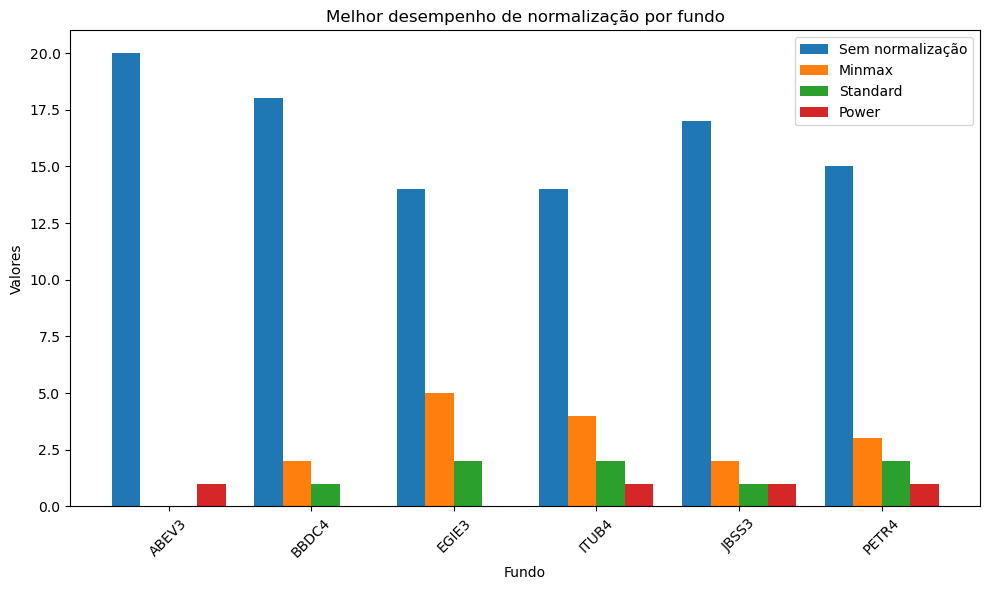

In [73]:
resultado_normalizacao = sorted(resultado_normalizacao, key=lambda x: x['Fundo'])
# Preparando os dados
fundos_nomes = [fundo['Fundo'] for fundo in resultado_normalizacao]
none = [fundo['none'] for fundo in resultado_normalizacao]
minmax = [fundo['minmax'] for fundo in resultado_normalizacao]
standard = [fundo['standard'] for fundo in resultado_normalizacao]
power = [fundo['power'] for fundo in resultado_normalizacao]

# Largura das barras
bar_width = 0.2
index = np.arange(len(resultado_normalizacao))

# Plotando o gráfico de barras
fig, ax = plt.subplots(figsize=(10, 6))

# Criando as barras
ax.bar(index, none, bar_width, label='Sem normalização')
ax.bar(index + bar_width, minmax, bar_width, label='Minmax')
ax.bar(index + 2 * bar_width, standard, bar_width, label='Standard')
ax.bar(index + 3 * bar_width, power, bar_width, label='Power')

# Ajustando os rótulos e títulos
ax.set_xlabel('Fundo')
ax.set_ylabel('Valores')
ax.set_title('Melhor desempenho de normalização por fundo')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(fundos_nomes)
ax.legend()

# Exibindo o gráfico
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [29]:
import matplotlib.dates as mdates


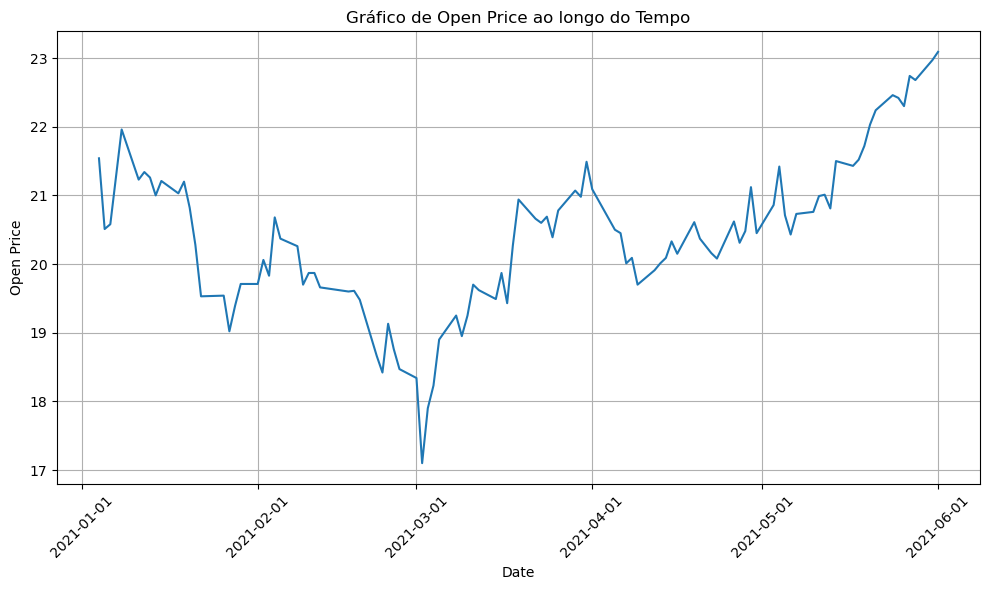

In [33]:
df = pd.read_csv('../Data/BBDC4_Daily.csv', sep = "\t")

# Converta a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['<DATE>'])
df = df[df['date'] >= '2021-01-01']  # Filtra a partir de 2021
# Plote o gráfico
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['<OPEN>'], label='Open Price')

# Ajuste os eixos
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Gráfico de Open Price ao longo do Tempo')
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização

# Adiciona o intervalo de tempo (por exemplo, de 1 mês)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Para intervalos mensais
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de data


plt.grid(True)
plt.tight_layout()  # Ajuste para não cortar labels
plt.show()


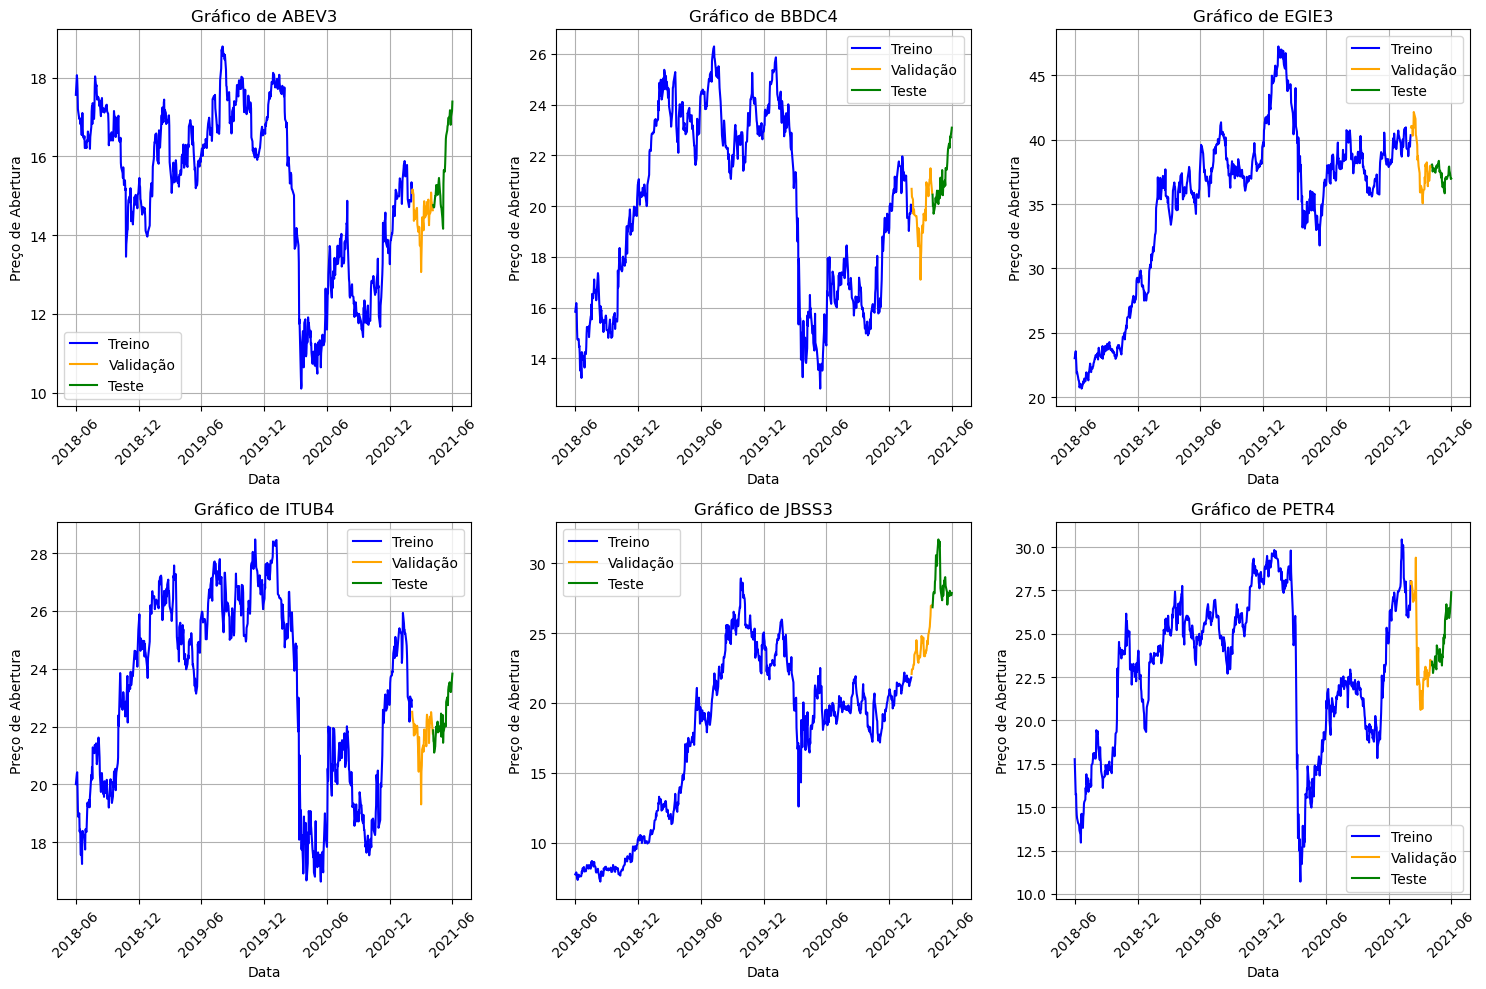

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Criar subplots
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))  # Ajuste conforme necessário

for i, fundo in enumerate(fundos):
    # Ler o CSV
    df = pd.read_csv(f'../Data/{fundo}_Daily.csv', sep="\t")
    
    # Converter a coluna 'date' para datetime
    df['date'] = pd.to_datetime(df['<DATE>'])
    df = df[df['date'] >= '2018-06-01']  # Filtrar a partir de 2018
    
    # Definir qual subgráfico será usado
    ax = axes[i // 3, i % 3]
    
    # Dividir os dados em três partes
    df_before = df[df['date'] < '2021-02-04']
    df_orange = df[(df['date'] >= '2021-02-04') & (df['date'] < '2021-04-06')]
    df_green = df[df['date'] >= '2021-04-06']
    
    # Plotar as diferentes partes do gráfico com cores específicas
    ax.plot(df_before['date'], df_before['<OPEN>'], color='blue', label='Treino')
    ax.plot(df_orange['date'], df_orange['<OPEN>'], color='orange', label='Validação')
    ax.plot(df_green['date'], df_green['<OPEN>'], color='green', label='Teste')
    
    # Ajustar os eixos e título
    ax.set_xlabel('Data')
    ax.set_ylabel('Preço de Abertura')
    ax.set_title(f'Gráfico de {fundo.split("/")[-1].split(".")[0]}')  # Nome do fundo no título
    ax.tick_params(axis='x', rotation=45)  # Rotaciona as datas para melhor visualização
    
    # Reduzir a densidade das datas no eixo X
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Exibir uma data a cada 6 meses
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Formato de data (Ano-Mês)
    
    # Adicionar grid
    ax.grid(True)
    
    # Adicionar legenda
    ax.legend()

# Ajustar layout para não cortar os gráficos
plt.tight_layout()
plt.show()


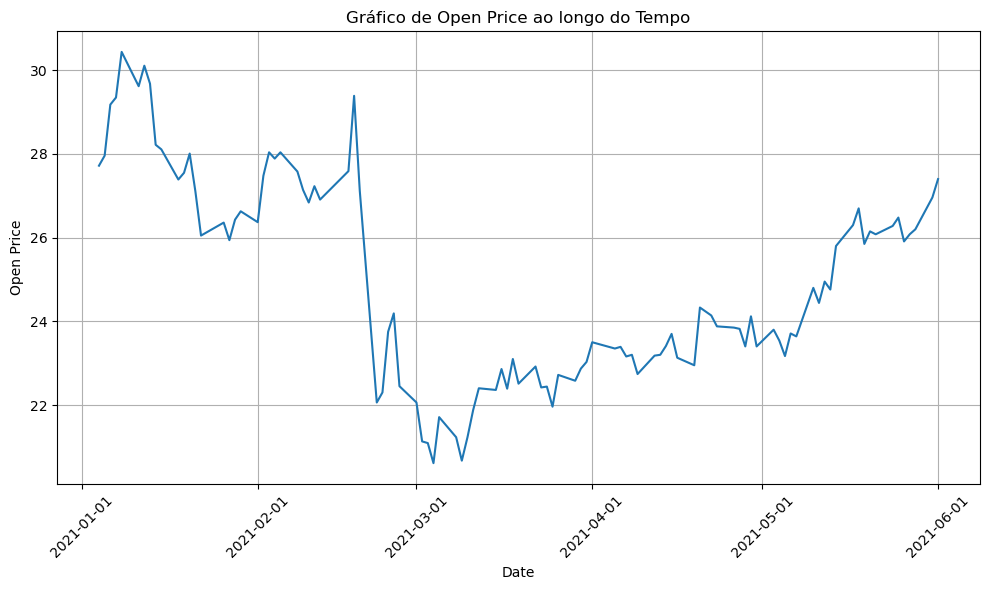

In [32]:
df = pd.read_csv('../Data/PETR4_Daily.csv', sep = "\t")

# Converta a coluna 'date' para datetime
df['date'] = pd.to_datetime(df['<DATE>'])
df = df[df['date'] >= '2021-01-01']  # Filtra a partir de 2021
# Plote o gráfico
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['<OPEN>'], label='Open Price')

# Ajuste os eixos
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.title('Gráfico de Open Price ao longo do Tempo')
plt.xticks(rotation=45)  # Rotaciona as datas para melhor visualização

# Adiciona o intervalo de tempo (por exemplo, de 1 mês)
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Para intervalos mensais
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # Formato de data


plt.grid(True)
plt.tight_layout()  # Ajuste para não cortar labels
plt.show()


In [193]:
curva_incerteza = 3
curva_sem_incerteza = df_resultados[df_resultados['Incerteza Threshold'] == "Incerteza não utilizada"]['FinalScore'].idxmax()


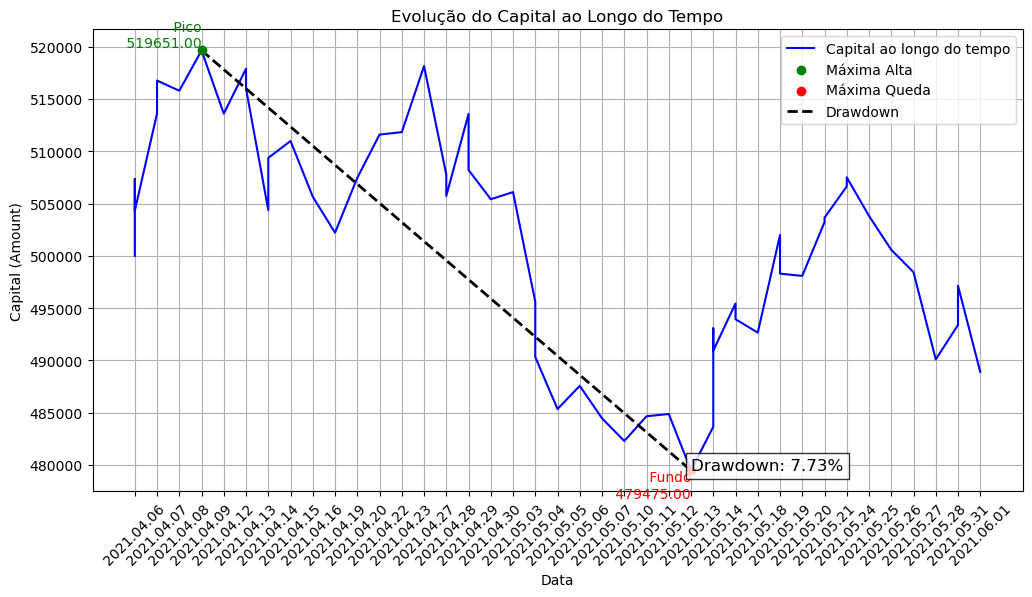

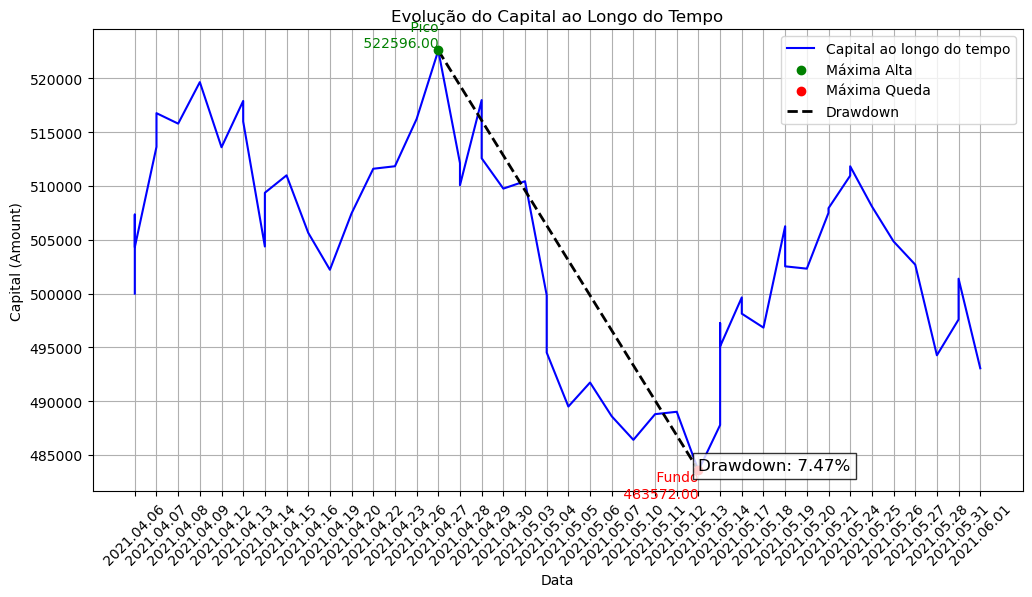

In [18]:
# Chamando a função com testPetr
plot_amount_curve(df_resultados.iloc[15]['testPetr'], df_resultados.iloc[15]['DDDF'])
plot_amount_curve(df_resultados.iloc[16]['testPetr'], df_resultados.iloc[16]['DDDF'])

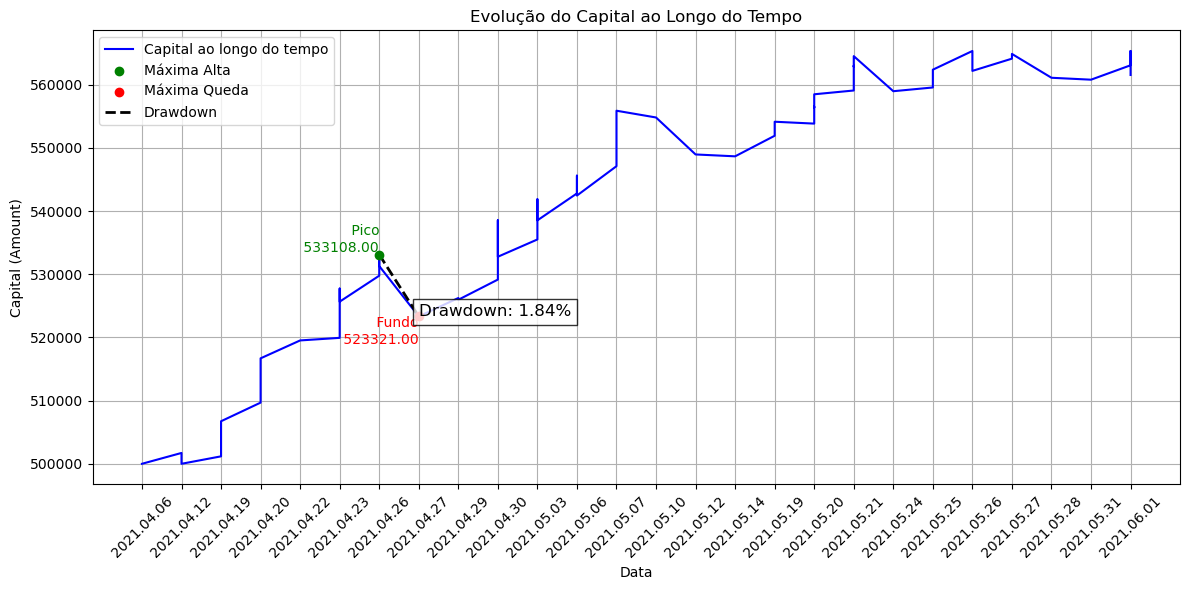

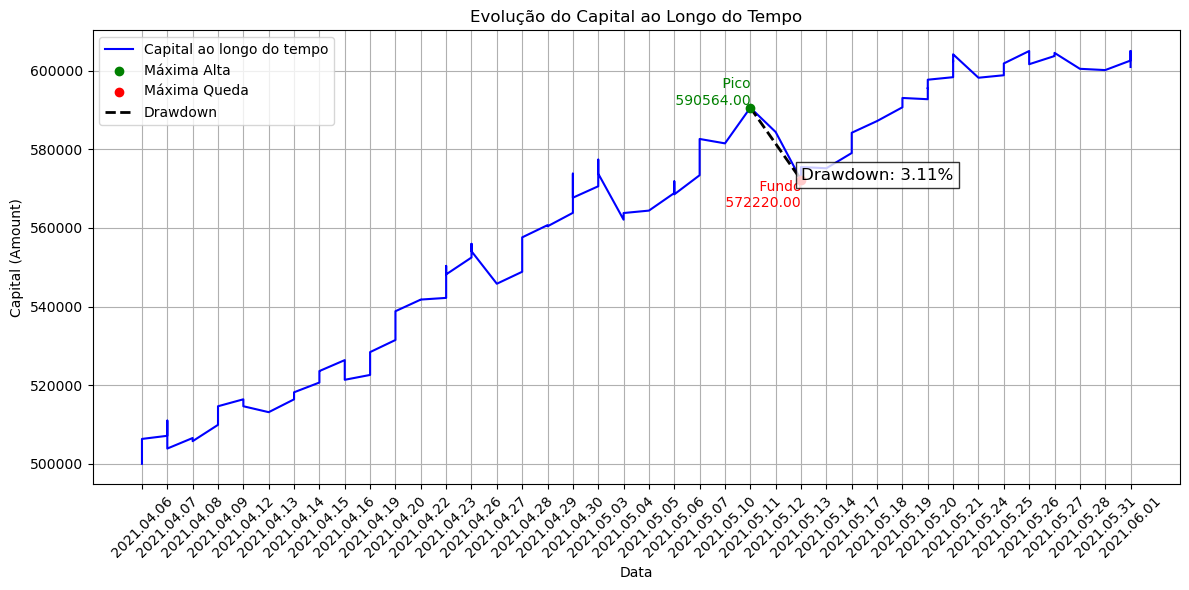

In [196]:
# # Selecionar os top 5 registros com maior FinalScore
top5 = df_resultados.sort_values(by='FinalScore', ascending=False).head(20)

# # Selecionar registros onde Incerteza Threshold == 0
incerteza_zero = df_resultados[df_resultados['Incerteza Threshold'] == "Incerteza não utilizada"]

# # Combinar ambos os conjuntos de dados e remover duplicatas com base em colunas selecionadas
df_resultados_finais = pd.concat([top5, incerteza_zero]).drop_duplicates(subset=df_resultados.columns.difference(['testPetr','DDDF']))

# # Remover a coluna "testPetr" antes de salvar
df_resultados_finais = df_resultados_finais.drop(columns=["testPetr","DDDF"], errors="ignore")

# # Salvar o resultado no CSV
df_resultados_finais.to_csv(f"Resultados/{fundo}/Resultados_valid_{fundo}.csv", index=False)


plot_amount_curve(df_resultados.iloc[curva_incerteza]['testPetr'], df_resultados.iloc[curva_incerteza]['DDDF'], f"Resultados/{fundo}/{fundo}_VALID_INCERTEZA.png")
plot_amount_curve(df_resultados.iloc[curva_sem_incerteza]['testPetr'], df_resultados.iloc[curva_sem_incerteza]['DDDF'], f"Resultados/{fundo}/{fundo}_VALID_SEM_INCERTEZA.png")
